In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/Videos-2.zip" "/content"

In [ ]:
!unzip *.zip && rm -rf *.zip

In [ ]:
!rm -rf "/content/__MACOSX"

In [ ]:
import os
drivers = [os.path.join("/content/Videos-2", driver) for driver in os.listdir("/content/Videos-2")]

In [ ]:
videos = []
labels = []
for driver in drivers:
  classes = [os.path.join(driver, _class) for _class in os.listdir(driver)]
  for _class in classes:
    video = [os.path.join(_class, _c) for _c in os.listdir(_class)][0]
    label = video.split("/")[-1].split(".")[0]
    videos.append(video)
    labels.append(label)

In [ ]:
import numpy as np
uniques = np.unique(np.array(labels))

In [ ]:
def getVideos(unique):
  _videos = []
  for label, video in zip(labels, videos):
    if label == unique:
      _videos.append(video)
  return _videos

In [ ]:
vids = []
lbls = []
for unique in uniques:
  _vids = getVideos(unique)
  vids.append(_vids)
  lbls.append(unique)

In [ ]:
vids

[['/content/Videos-2/Driver1/Safe_driving/Safe_driving.mp4',
  '/content/Videos-2/Driver7/Safe_driving/Safe_driving.mp4',
  '/content/Videos-2/Driver3/Safe_driving/Safe_driving.mp4',
  '/content/Videos-2/Driver6/Safe_driving/Safe_driving.mp4',
  '/content/Videos-2/Driver2/Safe_driving/Safe_driving.mp4',
  '/content/Videos-2/Driver9/Safe_driving/Safe_driving.mp4',
  '/content/Videos-2/Driver5/Safe_driving/Safe_driving.mp4',
  '/content/Videos-2/Driver10/Safe_driving/Safe_driving.mp4',
  '/content/Videos-2/Driver8/Safe_driving/Safe_driving.mp4',
  '/content/Videos-2/Driver4/Safe_driving/Safe_driving.mp4'],
 ['/content/Videos-2/Driver1/call_left/call_left.mp4',
  '/content/Videos-2/Driver7/call_left/call_left.mp4',
  '/content/Videos-2/Driver3/call_left/call_left.mp4',
  '/content/Videos-2/Driver6/call_left/call_left.mp4',
  '/content/Videos-2/Driver2/call_left/call_left.mp4',
  '/content/Videos-2/Driver9/call_left/call_left.mp4',
  '/content/Videos-2/Driver5/call_left/call_left.mp4',
  '

## Preprocessing Data

In [ ]:
import cv2

def get_frames(path):
    cap = cv2.VideoCapture(path)
    frames = []
    count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if count == 100:
            break
        frame = cv2.resize(frame, (224,224))
        frame = frame.astype("float32") / 255.0
        frames.append(frame)
        count += 1
    cap.release()
    return frames

In [ ]:
images = []
outputs = []

In [ ]:
for lbl, vid in zip(lbls, vids):
  for _vid in vid:
    _frames = get_frames(_vid)
    for _frame in _frames:
      images.append(_frame)
      outputs.append(lbl)

In [ ]:
images = np.array(images)
outputs = np.array(outputs)

In [ ]:
targets = []
for target in outputs:
  if target == 'Safe_driving':
    targets.append(0)
  elif target == 'call_left':
    targets.append(1)
  elif target == 'call_right':
    targets.append(2)
  elif target == "doze":
    targets.append(3)
  elif target == 'gear':
    targets.append(4)
  elif target == 'hair':
    targets.append(5)
  elif target == "radio":
    targets.append(6)
  elif target == 'reaching_hand_behind':
    targets.append(7)
  elif target == 'text_left':
    targets.append(8)
  elif target == "text_right":
    targets.append(9)
  elif target == "water":
    targets.append(10)

In [ ]:
len(targets), len(outputs)

(3574, 3574)

In [ ]:
from tensorflow.keras.utils import to_categorical
targetss = to_categorical(targets)

In [ ]:
from sklearn.model_selection import train_test_split
images_train, images_test, outputs_train, outputs_test = train_test_split(images, targetss, test_size=0.2, random_state=42)

In [ ]:
outputs_train.shape

(2859, 11)

## Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the VGG-16 model with pre-trained weights
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the layers in the base model
for layer in vgg.layers:
    layer.trainable = False

# Add a new classifier on top of the base model
x = Flatten()(vgg.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(11, activation='softmax')(x)

# Compile the model
model = Model(inputs=vgg.input, outputs=predictions)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
history = model.fit(images_train, outputs_train, batch_size=12, epochs=10, validation_data=(images_test, outputs_test))

Epoch 1/10
239/239 [==============================] - 32s 97ms/step - loss: 0.5464 - accuracy: 0.8807 - val_loss: 0.0338 - val_accuracy: 0.9930
Epoch 2/10
239/239 [==============================] - 21s 88ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 3/10
239/239 [==============================] - 22s 91ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4/10
239/239 [==============================] - 22s 91ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 0.9986
Epoch 5/10
239/239 [==============================] - 21s 88ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9986
Epoch 6/10
239/239 [==============================] - 21s 88ms/step - loss: 9.4833e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9986
Epoch 7/10
239/239 [==============================] - 21s 89ms/step - loss: 7.0344e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_a

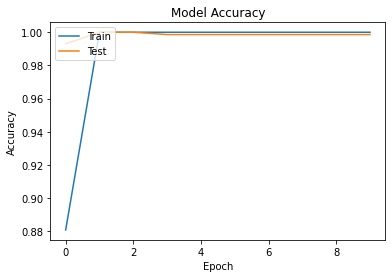

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


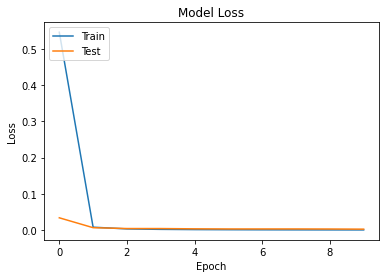

In [ ]:
# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
loss, acc = model.evaluate(images_test, outputs_test)

23/23 [==============================] - 8s 219ms/step - loss: 0.0025 - accuracy: 0.9986


In [ ]:
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")

Loss: 0.0024592778645455837
Accuracy: 0.9986013770103455


## Predictions

In [ ]:
outs = np.unique(outputs)

Real:  gear
1/1 [==============================] - 0s 18ms/step
Prediction:  gear


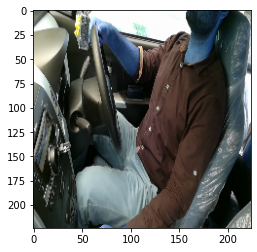

In [ ]:
plt.imshow(images_test[0])
print("Real: ", outs[np.argmax(outputs_test[0])])
print("Prediction: ", outs[np.argmax(model.predict(images_test[0].reshape(-1, 224, 224, 3)))])

Real:  call_left
1/1 [==============================] - 0s 19ms/step
Prediction:  call_left


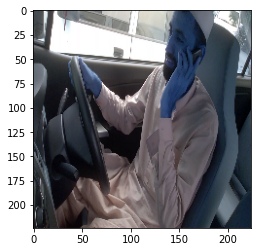

In [ ]:
plt.imshow(images_test[15])
print("Real: ", outs[np.argmax(outputs_test[15])])
print("Prediction: ", outs[np.argmax(model.predict(images_test[15].reshape(-1, 224, 224, 3)))])

Real:  water
1/1 [==============================] - 0s 17ms/step
Prediction:  water


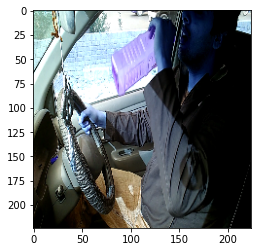

In [ ]:
plt.imshow(images_test[5])
print("Real: ", outs[np.argmax(outputs_test[5])])
print("Prediction: ", outs[np.argmax(model.predict(images_test[5].reshape(-1, 224, 224, 3)))])